<H1>MADATORY PYTHON LIBRARIES</H1>

In [649]:
import xarray
import pandas as pd
import folium
import os
import numpy as np
from folium import plugins
import datetime
import matplotlib.pyplot as plt
%matplotlib  inline

<h1>IN SITU GLIDERS</h1>

In Situ 'gliders' comprehends are moving platforms that follow a predefined route submerging every now and then in the water column to report profiles of certain parameters. In Situ gliders produce only PR data (profiles) and its platform data source is GL.

## 1. In Situ netCDF

Imagine you have downloaded some <i>_PR_ (profile)</i> dataset from In Situ gliders (see how to download files from a  certain [platform data source](https://github.com/CopernicusMarineInsitu/INSTAC-Tarining-Phase2/blob/master/PythonNotebook/In_Situ_data_download_by_platform_data_source.ipynb) or [platform category](https://github.com/CopernicusMarineInsitu/INSTAC-Tarining-Phase2/blob/master/PythonNotebooks/In_Situ_data_download_by_platform_type.ipynb)) like: [GL_PR_GL_68996.nc](ftp://nrt.cmems-du.eu/Core/INSITU_MED_NRT_OBSERVATIONS_013_035/history/profiler-glider/GL_PR_GL_68996.nc)

In [650]:
dataset = 'GL_PR_GL_68996.nc'

Let's have a look to its content:

In [651]:
full_path2file = os.getcwd()+'/'+dataset #default to current directory
print('path2file: %s'%(full_path2file))

path2file: /home/protllan/code/Training/INSTACTraining-PhaseII/PythonNotebooks/GL_PR_GL_68996.nc


In [652]:
ds = xarray.open_dataset(dataset)

ds contains all the information about the dataset (relevant metadata, variables, dimensions etc):

In [653]:
ds

<xarray.Dataset>
Dimensions:         (DEPTH: 1883, LATITUDE: 199, LONGITUDE: 199, POSITION: 199, TIME: 199)
Coordinates:
  * TIME            (TIME) datetime64[ns] 2011-01-25T17:35:40.963200 ...
  * LATITUDE        (LATITUDE) float64 0.0 39.58 39.58 39.58 39.6 39.6 39.6 ...
  * LONGITUDE       (LONGITUDE) float64 0.0 2.282 2.278 2.276 2.262 2.26 ...
Dimensions without coordinates: DEPTH, POSITION
Data variables:
    TIME_QC         (TIME) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    POSITION_QC     (POSITION) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 ...
    DC_REFERENCE    (TIME) object '40453189                        ' ...
    DATA_MODE       (TIME) object 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' ...
    DIRECTION       (TIME) object 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' 'D' ...
    DATA_MODE_CORA  (TIME) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    PRES            (TIME, DEPTH) float64 15.63 15.85 16.1 16.39 16.72 17.13 ...
    PRES_QC         (TIME, DEPTH) floa

In [539]:
ds.variables.keys()

[u'TIME',
 u'TIME_QC',
 u'LATITUDE',
 u'LONGITUDE',
 u'POSITION_QC',
 u'DC_REFERENCE',
 u'DATA_MODE',
 u'DIRECTION',
 u'DATA_MODE_CORA',
 u'PRES',
 u'PRES_QC',
 u'TEMP',
 u'TEMP_QC',
 u'PSAL',
 u'PSAL_QC',
 u'TEMP_DOXY',
 u'TEMP_DOXY_QC',
 u'CPHL',
 u'CPHL_QC',
 u'TUR4',
 u'TUR4_QC',
 u'DOX2',
 u'DOX2_QC',
 u'CNDC',
 u'CNDC_QC']

Every of the above parameters varies along certain dimensions (within parenthesis when checking the parameter metadata):

In [540]:
ds['LATITUDE']

<xarray.DataArray 'LATITUDE' (LATITUDE: 199)>
array([  0.      ,  39.575829,  39.579788,  39.5825  ,  39.597912,  39.599449,
        39.601082,  39.602749,  39.60746 ,  39.609241,  39.611031,  39.612782,
        39.614559,  39.617249,  39.62009 ,  39.621601,  39.623089,  39.626091,
        39.627529,  39.629059,  39.6306  ,  39.634548,  39.63612 ,  39.637562,
        39.638519,  39.639622,  39.64119 ,  39.642731,  39.64431 ,  39.64576 ,
        39.646629,  39.647148,  39.6479  ,  39.65086 ,  39.654289,  39.65852 ,
        39.662979,  39.667629,  39.672901,  39.678341,  39.687431,  39.699348,
        39.718349,  39.741741,  39.764858,  39.77483 ,  39.803371,  39.829239,
        39.845009,  39.870659,  39.89019 ,  39.89584 ,  39.90329 ,  39.920021,
        39.894642,  39.870449,  39.849079,  39.819241,  39.791569,  39.764271,
        39.7332  ,  39.704651,  39.679272,  39.649361,  39.617641,  39.586578,
        39.559269,  39.544418,  39.513519,  39.483582,  39.450951,  39.417412,
      

Every of the above variables have a corresponding '_QC' variable, which is the variable that contains the data quality flags:

In [541]:
ds['POSITION_QC']

<xarray.DataArray 'POSITION_QC' (POSITION: 199)>
array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., 

This '_QC' variable will therefore guide us when when working with the parameter data to distinguish good from bad data: 

In [542]:
pd.DataFrame(data=ds['POSITION_QC'].attrs['flag_values'], index = ds['POSITION_QC'].attrs['flag_meanings'].split(' '), columns = ['quality flag'])

,quality flag
no_qc_performed,0
good_data,1
probably_good_data,2
bad_data_that_are_potentially_correctable,3
bad_data,4
value_changed,5
not_used,6
nominal_value,7
interpolated_value,8
missing_value,9


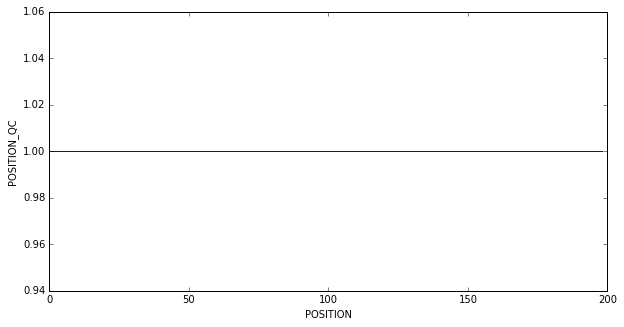

In [543]:
ds['POSITION_QC'].plot(aspect=2, size=5)

In this case, all positions are considered 'good' so we skip any further data selection to overlook not-good data.

## 2. Animating a glider trajectory with folium

### a) First glimpse

In [544]:
lats = ds['LATITUDE'].values.tolist()
lons = ds['LONGITUDE'].values.tolist()
times = ds['TIME'].values.tolist()

In [545]:
mean_lat = np.mean(lats)
mean_lon = np.mean(lons)

In [546]:
glider = {
    'type': 'Feature',
    'geometry': {
        'type': 'LineString',
        'coordinates': []
    },
    'properties': {
        'times': [],
        'variable': []
    }
}

In [547]:
for time, lat, lon in zip(times, lats, lons) :
    unix_timestamp = int(str(time)[:13])
    glider['properties']['times'].append(unix_timestamp)
    glider['geometry']['coordinates'].append([lon,lat])

In [548]:
view = folium.Map(location=[mean_lat, mean_lon], zoom_start=8)
marker = plugins.TimestampedGeoJson({
    'type': 'FeatureCollection',
    'features': [glider],
}, period='PT1H', add_last_point=True, loop=False).add_to(view)
view

From above whe see: 
<ul>
<li>At leats 2 deployments of the same platform (glider):</li>
<ul>
<li>From 2011-01-25 to 2011-01-31</li>
<li>From 2011-02-04 to 2011-02-05</li>
</ul>
<li>lat-lon errors (beginning and end of the first deployment)</li>
</ul>

### b) Finding deployments

Let's find first the different deployments. What will help to split the platform file in deployments?  Time 'jumps' (pause among deployments) will point out the end and beginning of a deployment. This way we first will try to find these so called 'jumps':

In [594]:
unix_time = []
for item in ds['TIME'].values.tolist():
    unix_time.append(int(str(item)[:10]))

Let's compute time steps to find the peaks (pauses)

<Container object of 198 artists>

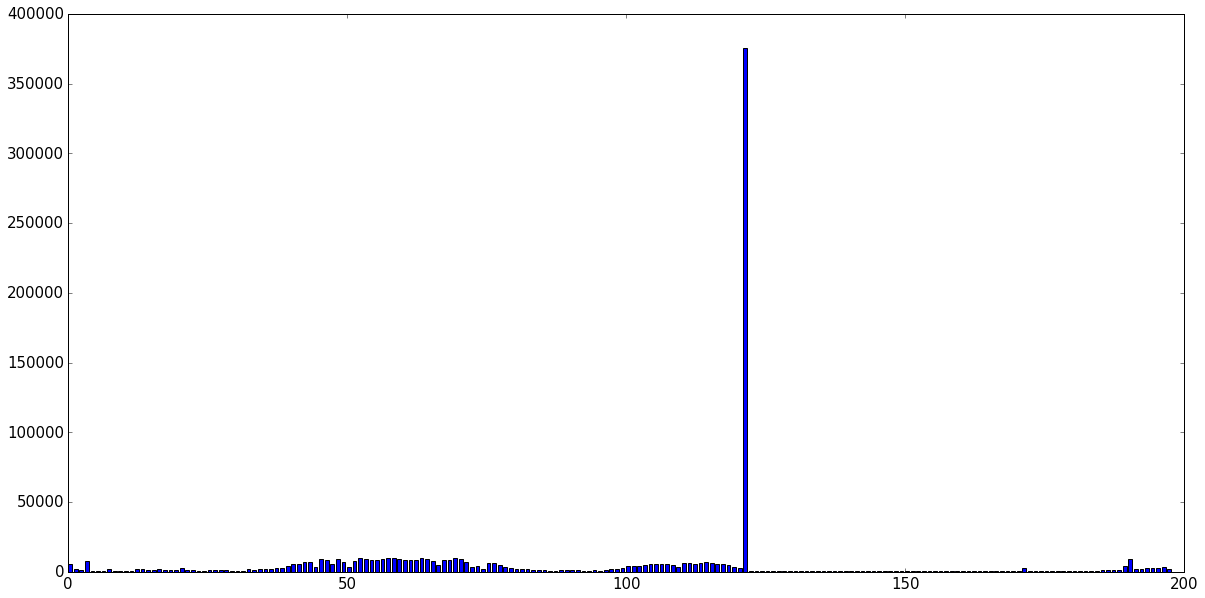

In [656]:
plt.rcParams.update({'font.size': 15})
y = np.diff(unix_time).tolist()
N = len(y)
x = range(N)
width = 1/1.5
fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(x, y, width, color="blue")

In [657]:
np.mean(np.diff(unix_time[:100]).tolist()))#regular transimission cadence

3803.0808080808079

In [662]:
deployments_break = []
diff = np.diff(unix_time).tolist()
for n in range(0, len(unix_time)-1):
    if diff[n] > 24*np.mean(np.diff(unix_time[:100]).tolist()): 
        deployments_break.append(n)
print('There has been at least %s deployments of this same platform (vessel)'%(len(deployments_break)+1))

There has been at least 2 deployments of this same platform (vessel)


In [645]:
range_limits = []
for n in range(0, len(deployments_break)+1):
    if n == 0:
        range_limits.append([0, deployments_break[n]+1])
    elif n == len(deployments_break):
        range_limits.append([deployments_break[n-1]+1, len(lats)])
    else:
        range_limits.append([deployments_break[n-1]+1, deployments_break[n]+1])

In [646]:
range_limits

[[0, 122], [122, 199]]

In [647]:
for item in range_limits:
    print('from %s to %s'%(datetime.datetime.fromtimestamp(unix_time[item[0]]).strftime('%y-%m-%d'),datetime.datetime.fromtimestamp(unix_time[item[1]-1]).strftime('%y-%m-%d')))

from 11-01-25 to 11-01-31
from 11-02-04 to 11-02-05


Let's animate again the different deployments:

In [648]:
deployments = []
for item in range_limits:
    deployment = {
        'type': 'Feature',
        'geometry': {
            'type': 'LineString',
            'coordinates': []
        },
        'properties': {
            'times': [],
            'variable': []
        }
    }
    for n in range(item[0],item[1]):
        unix_timestamp = int(str(times[n])[:13])
        deployment['properties']['times'].append(unix_timestamp)
        deployment['geometry']['coordinates'].append([lons[n],lats[n]])
    deployments.append(deployment)

In [626]:
view = folium.Map(location=[mean_lat, mean_lon], zoom_start=8)
marker = plugins.TimestampedGeoJson({
    'type': 'FeatureCollection',
    'features': deployments,
}, period='PT1H', add_last_point=True, loop=False).add_to(view)
view

### c) Removing noise from lat-lon

The above first deployment contains some outliers in the positions. Let's get rid of them:

In [601]:
mean_latdeployment = np.mean(lats[range_limits[0][0]:range_limits[0][1]])
mean_londeployment = np.mean(lons[range_limits[0][0]:range_limits[0][1]])

In [602]:
lats_2befiltered = [n for n in range(0,len(deployment1_lats)) if deployment1_lats[n]>3*mean_latdeployment or deployment1_lats[n]<mean_latdeployment/3]
lons_2befiltered = [n for n in range(0,len(deployment1_lons)) if deployment1_lons[n]>3*mean_londeployment or deployment1_lons[n]<mean_londeployment/3]

In [603]:
lats_2befiltered

[0, 119, 120, 121]

In [604]:
lons_2befiltered

[0, 119, 120, 121]

In [605]:
deployment1_filtered = {
    'type': 'Feature',
    'geometry': {
        'type': 'LineString',
        'coordinates': []
    },
    'properties': {
        'times': [],
        'variable': []
    }
}

In [606]:
for time, lat, lon in zip(times[range_limits[0][0]:range_limits[0][1]], lats[range_limits[0][0]:range_limits[0][1]], lons[range_limits[0][0]:range_limits[0][1]]):
    index = times.index(time)
    if index in [0,119,120, 121]:
        continue
    else:
        unix_timestamp = int(str(time)[:13])
        deployment1_filtered['properties']['times'].append(unix_timestamp)
        deployment1_filtered['geometry']['coordinates'].append([lon,lat])

In [607]:
deployments[0] = deployment1_filtered

In [608]:
view = folium.Map(location=[mean_lat, mean_lon], zoom_start=8)
marker = plugins.TimestampedGeoJson({
    'type': 'FeatureCollection',
    'features': deployments,
}, period='PT1H', add_last_point=True, loop=False).add_to(view)
view